<a href="https://colab.research.google.com/github/oklawyer71/cyber_security/blob/main/Clustering_exp_Cyber_Security_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing packages

import pandas as pd
from google.colab import files
from google.colab import drive

# Mount drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading in the Datasets - Segmented by Category

df_benign = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features_domain_benign_csv.csv")
df_spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Spam.csv")
df_phishing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_phishing.csv")
df_malware = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Malware.csv")

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 14.9 M

In [92]:
# Here we create a variable to use so that we take a subset of 1,000 records for any sample that we use this variable in.

SUBSET_TO_USE=2000

In [93]:
# Sampling the Malware dataset

df_subset_malware = df_malware.sample(SUBSET_TO_USE).sort_index()
df_subset_malware.describe()

,Alexa_Rank,len,obfuscate_at_sign,subdomain,entropy,Page_Rank,oc_8,numeric_percentage,hex_32,dec_8,dec_32,shortened,puny_coded,Name_Server_Count,oc_32,hex_8
count,1.910000e+03,2000.000000,2000.0,2000.000000,2000.000000,1013.0,2000.0,2000.000000,2000.0,2000.0,2000.000000,1977.0,2000.0,1910.000000,2000.000000,2000.0
mean,4.231094e+05,15.870500,0.0,0.419500,2.975951,-1.0,0.0,4.100073,0.0,0.0,0.011000,-1.0,0.0,3.181152,0.000500,0.0
std,1.782890e+06,8.692497,0.0,0.493601,0.557370,0.0,0.0,8.902430,0.0,0.0,0.104329,0.0,0.0,3.437637,0.022361,0.0
min,-1.000000e+00,3.000000,0.0,0.000000,1.000000,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.0,0.000000,0.000000,0.0
25%,-1.000000e+00,10.000000,0.0,0.000000,2.598485,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.0,2.000000,0.000000,0.0
50%,-1.000000e+00,14.000000,0.0,0.000000,3.023946,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.0,2.000000,0.000000,0.0
75%,1.567000e+03,19.000000,0.0,1.000000,3.353043,-1.0,0.0,3.205819,0.0,0.0,0.000000,-1.0,0.0,4.000000,0.000000,0.0
max,1.221353e+07,122.000000,0.0,1.000000,4.766781,-1.0,0.0,57.142857,0.0,0.0,1.000000,-1.0,0.0,66.000000,1.000000,0.0


In [94]:
# Sampling the Benign dataset

df_subset_benign = df_benign.sample(SUBSET_TO_USE).sort_index()
df_subset_benign.describe()

,subdomain,len,numeric_percentage,entropy,obfuscate_at_sign,dec_8,dec_32,oc_8,oc_32,hex_8,hex_32,puny_coded,shortened,Name_Server_Count,Alexa_Rank,Page_Rank
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.0,2000.000000,2000.0,2000.0,2000.0,1988.0,1896.000000,1.896000e+03,1205.0
mean,0.378500,10.743000,0.778001,2.510655,0.0,0.0,0.005500,0.0,0.000500,0.0,0.0,0.0,-1.0,4.505802,7.091214e+05,-1.0
std,0.485134,4.384468,4.153835,0.561690,0.0,0.0,0.073976,0.0,0.022361,0.0,0.0,0.0,0.0,4.667743,1.908355e+06,0.0
min,0.000000,1.000000,0.000000,-0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-1.0,0.000000,-1.000000e+00,-1.0
25%,0.000000,8.000000,0.000000,2.125000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-1.0,2.000000,3.765750e+03,-1.0
50%,0.000000,10.000000,0.000000,2.595489,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-1.0,4.000000,4.247750e+04,-1.0
75%,1.000000,13.000000,0.000000,2.929439,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-1.0,6.000000,2.366920e+05,-1.0
max,1.000000,28.000000,58.333333,3.827151,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,-1.0,55.000000,1.200980e+07,-1.0


In [95]:
# Sampling the Spam dataset

df_subset_spam = df_spam.sample(SUBSET_TO_USE).sort_index()
df_subset_spam.describe()

,oc_8,hex_32,puny_coded,Page_Rank,Alexa_Rank,hex_8,oc_32,len,dec_8,entropy,numeric_percentage,subdomain,dec_32
count,2000.0,2000.0,2000.000000,0.0,1.841000e+03,2000.0,2000.0,2000.00000,2000.0,2000.000000,2000.000000,1995.000000,2000.0000
mean,0.0,0.0,0.051500,NaN,5.560712e+05,0.0,0.0,13.03200,0.0,2.829004,4.567531,0.225063,0.0100
std,0.0,0.0,0.221071,NaN,1.891940e+06,0.0,0.0,4.95371,0.0,0.525015,10.441439,0.417728,0.1998
min,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,5.00000,0.0,0.000000,0.000000,0.000000,0.0000
25%,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,9.00000,0.0,2.406304,0.000000,0.000000,0.0000
50%,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,12.00000,0.0,2.963120,0.000000,0.000000,0.0000
75%,0.0,0.0,0.000000,NaN,-1.000000e+00,0.0,0.0,16.00000,0.0,3.202820,0.000000,0.000000,0.0000
max,0.0,0.0,1.000000,NaN,9.310717e+06,0.0,0.0,32.00000,0.0,3.936889,53.846154,1.000000,4.0000


In [96]:
# Sampling the Phishing dataset

df_subset_phishing = df_phishing.sample(SUBSET_TO_USE).sort_index()
df_subset_phishing.describe()

,dec_8,Page_Rank,Alexa_Rank,shortened,dec_32,hex_32,subdomain,hex_8,oc_8,oc_32,Name_Server_Count,puny_coded,entropy,len,obfuscate_at_sign,numeric_percentage
count,2000.0,1806.0,1.806000e+03,1996.0,2000.000000,2000.0,2000.000000,2000.0,2000.0,2000.0,1806.000000,2000.0,2000.000000,2000.000000,2000.0,2000.000000
mean,0.0,-1.0,9.192449e+05,-1.0,0.002000,0.0,0.592000,0.0,0.0,0.0,5.460687,0.0,2.911511,15.735500,0.0,2.841109
std,0.0,0.0,2.359267e+06,0.0,0.044688,0.0,0.491586,0.0,0.0,0.0,5.405276,0.0,0.591173,8.337043,0.0,8.415267
min,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.500000,2.000000,0.0,0.000000
25%,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2.000000,0.0,2.595489,11.000000,0.0,0.000000
50%,0.0,-1.0,1.000000e+00,-1.0,0.000000,0.0,1.000000,0.0,0.0,0.0,4.000000,0.0,2.896184,13.000000,0.0,0.000000
75%,0.0,-1.0,1.214262e+05,-1.0,0.000000,0.0,1.000000,0.0,0.0,0.0,8.000000,0.0,3.297698,19.000000,0.0,0.000000
max,0.0,-1.0,1.202996e+07,-1.0,1.000000,0.0,1.000000,0.0,0.0,0.0,55.000000,0.0,4.573895,70.000000,0.0,59.210526


In [97]:
# Adding a Category label to each (will not be used for our unsupervised learning, but is here to keep track)

df_subset_benign['category'] = 'benign'
df_subset_spam['category'] = 'spam'
df_subset_phishing['category'] = 'phishing'
df_subset_malware['category'] = 'malware'


In [99]:
# Combining datasets

df_lst = [df_subset_benign, df_subset_spam, df_subset_phishing, df_subset_malware]
df_comp = pd.concat(df_lst)

In [100]:
# Double Check that we have subsetted the data properly and have 1,000 records of each category

df_comp[['category']].describe()

,category
count,8000
unique,4
top,benign
freq,2000


In [101]:
# Double Check that we have subsetted the data properly and have 1,000 records of each category

freq_table = pd.Series(df_comp['category']).value_counts()
print(freq_table)

benign      2000
spam        2000
phishing    2000
malware     2000
Name: category, dtype: int64


In [102]:
# Checking the pivot of the country codes and category

pd.crosstab(df_comp.Country, df_comp.category, margins=True, normalize='index')

category,benign,malware,phishing,spam
Country,,,,
AE,0.181818,0.545455,0.272727,0.000000
AF,0.000000,0.000000,1.000000,0.000000
AL,0.000000,0.000000,1.000000,0.000000
AR,0.200000,0.400000,0.400000,0.000000
AT,0.833333,0.000000,0.166667,0.000000
...,...,...,...,...
hk,1.000000,0.000000,0.000000,0.000000
im,0.000000,1.000000,0.000000,0.000000
uganda,1.000000,0.000000,0.000000,0.000000


In [103]:
# Grouping the numeric values by category

df_comp.groupby('category').mean().T

category,benign,malware,phishing,spam
subdomain,0.378500,0.419500,0.592000,0.225063
len,10.743000,15.870500,15.735500,13.032000
numeric_percentage,0.778001,4.100073,2.841109,4.567531
entropy,2.510655,2.975951,2.911511,2.829004
dec_8,0.000000,0.000000,0.000000,0.000000
dec_32,0.005500,0.011000,0.002000,0.010000
oc_8,0.000000,0.000000,0.000000,0.000000
oc_32,0.000500,0.000500,0.000000,0.000000
hex_8,0.000000,0.000000,0.000000,0.000000
hex_32,0.000000,0.000000,0.000000,0.000000


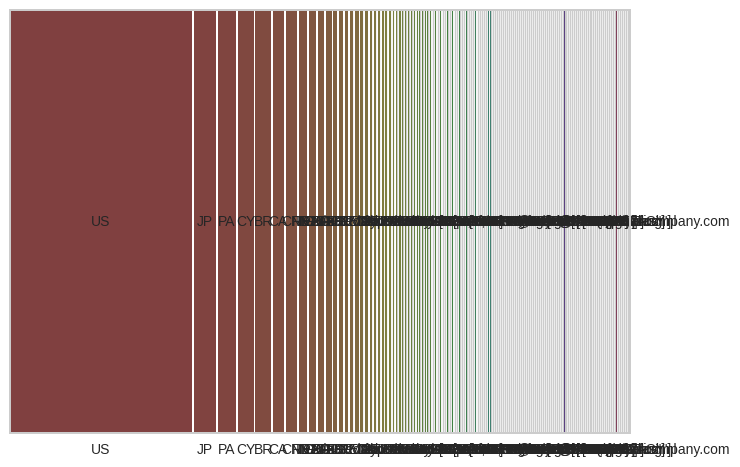

In [104]:
# Checking out the frequency via the mosaic plot

import statsmodels.graphics.mosaicplot as mp
freq_table = pd.Series(df_comp['Country']).value_counts()
mp.mosaic(freq_table);

Update Domain Age to numeric.

In [105]:
# As we can see here, domain is not a numeric value

df_comp['Domain_Age'].head()

11     5378 days, 10:09:41.956926
31     6872 days, 15:20:17.698014
55    11949 days, 10:55:16.174764
62                              0
67                            NaN
Name: Domain_Age, dtype: object

In [106]:
# Creating a function

def domain_age_num(domain_age):
   age = re.search('[0-9]+', domain_age).group()
   return age

In [107]:
df_comp['Domain_Age_num'] = df_comp['Domain_Age']

In [108]:
df_comp['Domain_Age_num'].isnull().sum()

547

Convert the Domain age from string to an integer

In [109]:
import re
df_comp['Domain_Age_num'] = df_comp['Domain_Age_num'].fillna("10000")
df_comp['Domain_Age_num'] = df_comp['Domain_Age_num'].apply(domain_age_num)
df_comp['Domain_Age_num'].head()
df_comp['Domain_Age_num'] = pd.to_numeric(df_comp['Domain_Age_num'], errors='coerce')

array([[<Axes: title={'center': 'Domain_Age_num'}>]], dtype=object)

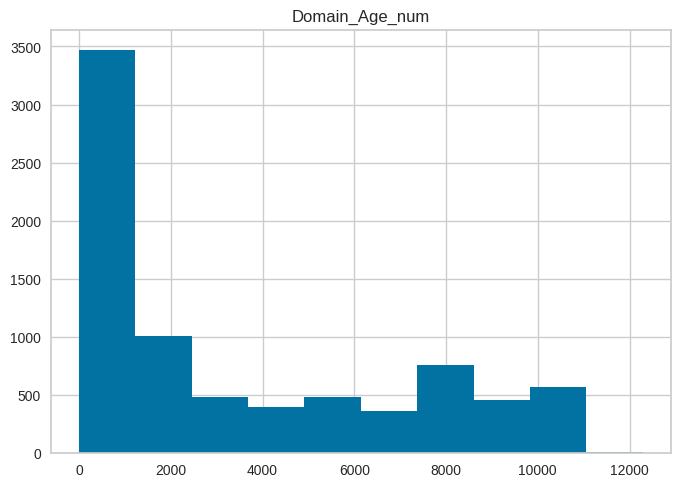

In [110]:
df_comp.hist(column='Domain_Age_num')

convert country to numeric code

In [111]:
# Country is a string, so we need to convert this to numeric, using the factorize function

df_comp['Country_Codes'] = pd.factorize(df_comp['Country'])[0]

```
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Alexa_Rank               8460 non-null   float64
 1   Country                  5969 non-null   object
 2   distance_from_bad_words  8871 non-null   object



 3   len                      8871 non-null   int64  
 4   obfuscate_at_sign        8871 non-null   int64  
 5   subdomain                8871 non-null   int64  
 6   1gram                    8871 non-null   object
 7   entropy                  8871 non-null   float64
 8   longest_word             8871 non-null   object
 9   Page_Rank                4470 non-null   float64
 10  oc_8                     8871 non-null   int64  
 11  numeric_percentage       8871 non-null   float64
 12  2gram                    8871 non-null   object
 13  Registrant_Name          276 non-null    object
 14  Domain_Name              7727 non-null   object
 15  Domain_Age               8460 non-null   object
 16  hex_32                   8871 non-null   int64  
 17  dec_8                    8871 non-null   int64  
 18  3gram                    8871 non-null   object
 19  dec_32                   8871 non-null   int64  
 20  shortened                8810 non-null   float64
 21  sld                      8871 non-null   object
 22  tld                      8871 non-null   object
 23  Creation_Date_Time       7325 non-null   object
 24  puny_coded               8871 non-null   int64  
 25  char_distribution        8871 non-null   object
 26  Registrar                7219 non-null   object
 27  Name_Server_Count        8460 non-null   float64
 28  State                    5412 non-null   object
 29  typos                    8871 non-null   object
 30  Emails                   6639 non-null   object
 31  oc_32                    8871 non-null   int64  
 32  hex_8                    8871 non-null   int64  
 33  Organization             4866 non-null   object
 ```

In [112]:
# Resulting country numeric distribution

df_comp['Country_Codes'].describe()

count    8000.000000
mean        9.200875
std        19.656044
min        -1.000000
25%        -1.000000
50%         0.000000
75%        12.000000
max       134.000000
Name: Country_Codes, dtype: float64

Change the email field to first email and encode it to numeric

In [113]:
# Selecting only the first email, encoding to numeric

df_comp['Emails'].head()

11    ['abusecomplaints@markmonitor.com', 'whoisrequ...
31    ['abusecomplaints@markmonitor.com', 'whoisrequ...
55    ['domainabuse@cscglobal.com', 'domains@apple.c...
62                                                  NaN
67                                                  NaN
Name: Emails, dtype: object

In [114]:
def get_first_email(email_list):
    for first in email_list.split(','):
      return first

df_comp['Emails'] = df_comp['Emails'].fillna("unknown@gmail.com")
df_comp['Emails_first'] = df_comp['Emails'].apply(get_first_email)
df_comp['Emails_first'].head(10)
df_comp['Emails_first'] = pd.factorize(df_comp['Emails_first'])[0]
df_comp['Emails_first'].describe()

count    8000.000000
mean       72.434250
std       108.472212
min         0.000000
25%         2.000000
50%        10.000000
75%       101.000000
max       491.000000
Name: Emails_first, dtype: float64

Change the distance from bad words to numeric.

In [115]:
def get_numeric_distance(distance_bad):
    dist_val = eval(distance_bad)
    return sum(dist_val.values())

df_comp['distance_from_bad_words'].head()
df_comp['distance_bad_numeric'] = df_comp['distance_from_bad_words'].apply(get_numeric_distance)
df_comp['distance_bad_numeric'].describe()

count    8000.000000
mean       20.128637
std        15.466775
min         0.000000
25%        10.776515
50%        15.872159
75%        22.275095
max       117.676136
Name: distance_bad_numeric, dtype: float64

Change Domain name to first domain name

In [116]:
import ast
def get_first_domain_name(domain_name):
    domain_name_val = ""
    try:
        domain_name_val = ast.literal_eval(domain_name)
        return domain_name_val[0]
    except (ValueError, SyntaxError):
      return domain_name_val


df_comp['Domain_Name'] = df_comp['Domain_Name'].fillna("unknown@unknown.com")
df_comp['Domain_Name_first'] = df_comp['Domain_Name'].apply(get_first_domain_name)
df_comp['Domain_Name_first'].head(10)
df_comp['Domain_Name_first'] = pd.factorize(df_comp['Domain_Name_first'])[0]
df_comp['Domain_Name_first'].describe()

count    8000.00000
mean      295.33075
std       443.83679
min         0.00000
25%         3.00000
50%         3.00000
75%       675.00000
max      1628.00000
Name: Domain_Name_first, dtype: float64

Convert TLD to numeric codes

In [117]:
df_comp['tld_codes'] = pd.factorize(df_comp['tld'])[0]
df_comp['tld_codes'].describe()

count    8000.000000
mean       24.716625
std        50.548758
min        -1.000000
25%         0.000000
50%         0.000000
75%        14.000000
max       249.000000
Name: tld_codes, dtype: float64

Convert SLD to numeric codes

In [118]:
df_comp['sld_codes'] = pd.factorize(df_comp['sld'])[0]
df_comp['sld_codes'].describe()

count    8000.000000
mean     2040.076625
std      1135.533944
min        -1.000000
25%      1391.750000
50%      1939.000000
75%      2774.000000
max      4435.000000
Name: sld_codes, dtype: float64

In [126]:
#Gather features to run algorithm on

df_ml_algo = df_comp[['Alexa_Rank','Country_Codes', 'len', 'obfuscate_at_sign', 'subdomain', 'tld_codes', 'sld_codes', 'entropy', 'Page_Rank',
                      'numeric_percentage', 'Registrant_Name', 'Domain_Name_first', 'Domain_Age_num', 'shortened', 'puny_coded' ,
                      'Name_Server_Count', 'Emails_first', 'distance_bad_numeric', 'category']]

# 'Registrant_Name', , 'category'

In [120]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [121]:
gpu_available=False
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  gpu_available=False
  print('Not connected to a GPU')
else:
  gpu_available=True
  print(gpu_info)


/bin/bash: line 1: nvidia-smi: command not found


In [122]:
import pycaret

In [123]:
# Check to see if GPU is available for us to use through Colab

gpu_available

True

In [140]:
# This step has code ready if we wanted to compare to another model

df_ml_algo_train = df_ml_algo.sample(frac=0.85, random_state=25)
# df_ml_algo_test = df_ml_algo.drop(df_ml_algo_train.index)

# print(f"No. of training examples: {df_ml_algo_train.shape[0]}")
# print(f"No. of testing examples: {df_ml_algo_test.shape[0]}")

In [141]:
from pycaret.clustering import *
s = setup(df_ml_algo_train, session_id = 123, index=False, use_gpu=gpu_available, ignore_features='category')

,Description,Value
0,Session id,123
1,Original data shape,"(6800, 19)"
2,Transformed data shape,"(6800, 172)"
3,Ignore features,8
4,Numeric features,14
5,Categorical features,4
6,Rows with missing values,98.4%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [130]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [131]:
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [132]:
# init setup on exp
exp.setup(df_ml_algo_train, session_id = 123, index=False, use_gpu=gpu_available, ignore_features='category')

,Description,Value
0,Session id,123
1,Original data shape,"(6800, 19)"
2,Transformed data shape,"(6800, 172)"
3,Ignore features,8
4,Numeric features,14
5,Categorical features,4
6,Rows with missing values,98.4%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [133]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [134]:
model = create_model("kmeans", num_clusters= 4)
evaluate_model(model)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8940,60354.8544,0.4548,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [136]:
assign_model(model)

,Alexa_Rank,Country_Codes,len,obfuscate_at_sign,subdomain,tld_codes,sld_codes,entropy,Page_Rank,numeric_percentage,Registrant_Name,Domain_Name_first,Domain_Age_num,shortened,puny_coded,Name_Server_Count,Emails_first,distance_bad_numeric,Cluster
0,-1.0,-1,23,0,1.0,34,2361,3.511456,-1.0,0.000000,SUB-1108053,3,368,-1.0,0,5.0,2,22.100378,Cluster 0
1,-1.0,12,11,0,0.0,82,1014,3.144938,-1.0,25.000000,NaN,3,418,-1.0,0,2.0,190,33.312500,Cluster 0
2,-1.0,7,14,0,0.0,0,2728,3.195766,-1.0,5.263158,NaN,972,896,-1.0,0,4.0,64,55.170456,Cluster 0
3,2568458.0,0,12,0,0.0,0,373,2.619549,NaN,0.000000,NaN,3,1305,-1.0,0,4.0,90,32.909092,Cluster 2
4,-1.0,-1,8,0,0.0,0,3289,2.625000,NaN,30.769230,NaN,1240,4942,-1.0,0,4.0,138,40.015152,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,-1.0,-1,8,0,0.0,18,1394,2.375000,-1.0,0.000000,NaN,3,340,-1.0,0,2.0,231,33.291668,Cluster 0
6796,-1.0,0,11,0,0.0,0,1807,2.963120,NaN,0.000000,NaN,697,132,-1,0,2,10,20.965910,Cluster 0
6797,-1.0,0,19,0,1.0,0,1830,3.313312,NaN,0.000000,NaN,704,150,-1,0,3,146,13.547348,Cluster 0
6798,-1.0,67,14,0,0.0,0,1844,2.963972,NaN,0.000000,NaN,733,173,-1,0,6,279,17.738636,Cluster 0


In [137]:
save_model(model, 'kmeans_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Alexa_Rank', 'Country_Codes',
                                              'len', 'subdomain', 'tld_codes',
                                              'sld_codes', 'entropy',
                                              'Page_Rank', 'numeric_percentage',
                                              'Domain_Name_first',
                                              'Domain_Age_num', 'puny_coded',
                                              'Emails_first',
                                              'distance_bad_numeric'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['obfuscate_at_sign',
                            